In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("14-income_evaluation.csv") 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [7]:
col_names = ['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']

In [8]:
df.columns = col_names

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
categorical = [col for col in df.columns if df[col].dtype =="O"]
numerical = [col for col in df.columns if df[col].dtype !="O"]

In [11]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [12]:
numerical

['age',
 'finalweight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [13]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [14]:
for col in categorical:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

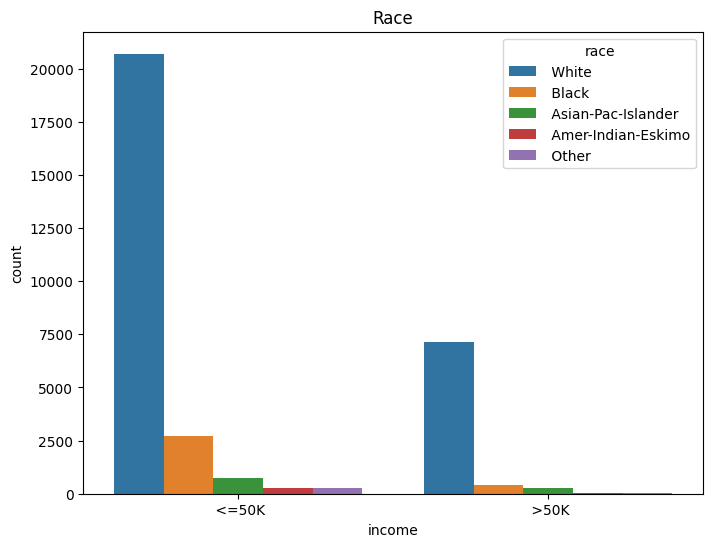

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot( x= "income", hue="race", data=df)
ax.set_title("Race")
plt.show()

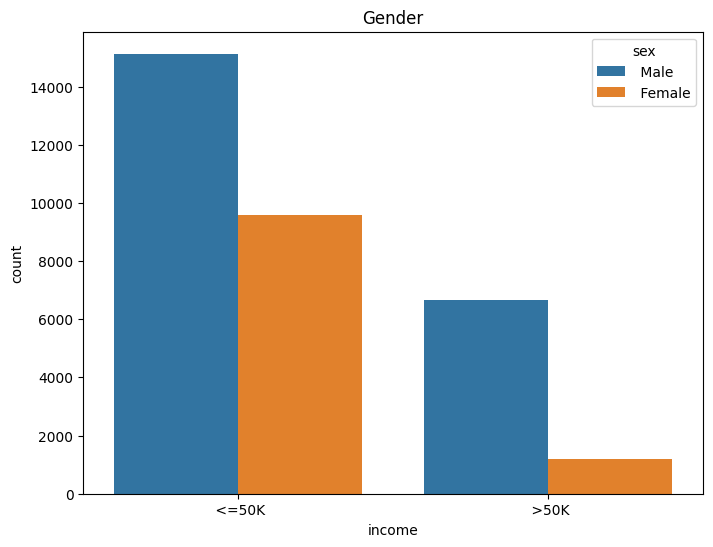

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot( x= "income", hue="sex", data=df)
ax.set_title("Gender")
plt.show()

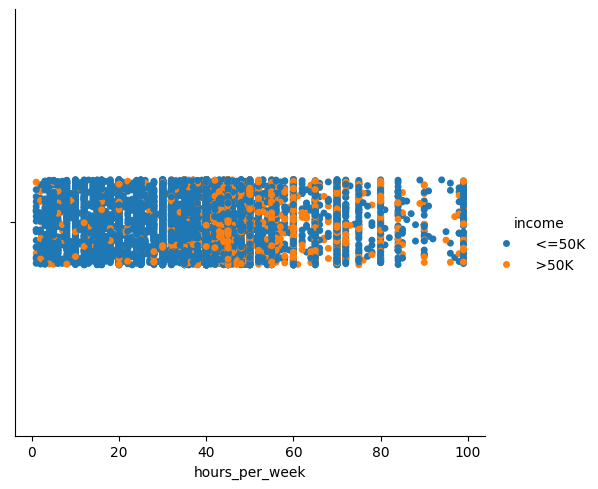

In [17]:

ax = sns.catplot( x= "hours_per_week", hue="income", data=df)

plt.show()

In [18]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [20]:
df["workclass"] = df["workclass"].replace(" ?", np.nan)

In [21]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
df["occupation"] = df["occupation"].replace(" ?", np.nan)

In [23]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [24]:
df["native_country"] = df["native_country"].replace(" ?", np.nan)

In [25]:
df.isnull().sum()

age                  0
workclass         1836
finalweight          0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [26]:
X = df.drop("income", axis=1)
y = df["income"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [28]:
categorical = [col for col in X_train.columns if X_train[col].dtype =="O"]

In [29]:
X_train[categorical].isnull().sum()

workclass         1276
education            0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
native_country     414
dtype: int64

In [30]:
X_test[categorical].isnull().sum()

workclass         560
education           0
marital_status      0
occupation        565
relationship        0
race                0
sex                 0
native_country    169
dtype: int64

In [31]:
for i in [X_train, X_test]:
    i["workclass"]= i["workclass"].fillna(X_train["workclass"].mode()[0])
    i["occupation"]= i["occupation"].fillna(X_train["occupation"].mode()[0])
    i["native_country"]= i["native_country"].fillna(X_train["native_country"].mode()[0])

In [32]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [33]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [34]:
# encoding

In [35]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [36]:
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == ">50K" else 0)

In [37]:
target_means = y_train_binary.groupby(X_train['native_country']).mean()

In [38]:
X_train["native_country_encoded"] = X_train["native_country"].map(target_means)
X_train["native_country_encoded"] = X_train["native_country_encoded"].fillna(y_train_binary.mean())

In [39]:
X_test["native_country_encoded"] = X_test["native_country"].map(target_means)
X_test["native_country_encoded"] = X_test["native_country_encoded"].fillna(y_train_binary.mean())

In [40]:
X_train = X_train.drop("native_country", axis=1)
X_test = X_test.drop("native_country", axis=1)

In [41]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [42]:
one_hot_categorical =['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [44]:
encoder = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown="ignore",sparse_output = False),one_hot_categorical)
],
                           remainder="passthrough")

In [45]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [46]:
X_train_enc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        60.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        38.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        50.        ,  0.24572168],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24572168],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        45.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        48.        ,  0.24572168]], shape=(22792, 65))

In [47]:
columns = encoder.get_feature_names_out()

In [51]:
X_train = pd.DataFrame(X_train_enc, columns = columns, index = X_train.index)
X_test = pd.DataFrame(X_test_enc, columns = columns, index = X_test.index)

In [52]:
cols = X_train.columns

In [53]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [54]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train = pd.DataFrame(X_train_enc, columns = cols)
X_test = pd.DataFrame(X_test_enc, columns = cols)

In [56]:
# training

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 15)
rfc.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
y_pred = rfc.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8470672535571706
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7407
        >50K       0.73      0.59      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

[[6891  516]
 [ 978 1384]]


In [63]:
# hyperparameter

In [66]:
rf_params = {
    "n_estimators" : [100, 200, 500, 1000],
    "max_depth" : [5, 8, 15, 10, None],
    "max_features" : ["sqrt", "log2", 5,6,7,8],
    "min_samples_split" : [2,8,15,20]
}

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
rfc = RandomForestClassifier()

In [70]:
rscv = RandomizedSearchCV(estimator= rfc, param_distributions= rf_params, cv=3, n_jobs=-1)
rscv.fit(X_train,y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [5, 8, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_split': [2, 8, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [71]:
y_pred = rscv.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.858941549800389
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.75      0.62      0.68      2362

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769

[[6917  490]
 [ 888 1474]]
